## DecisionTree

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.2, random_state = 2021
)

In [9]:
dt_clf = DecisionTreeClassifier(random_state = 2021)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

### Visualizing a model

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(
    dt_clf,
    out_file = 'tree.dot',
    class_names = iris.target_names,
    feature_names = iris.feature_names,
    impurity = True,
    filled = True
)

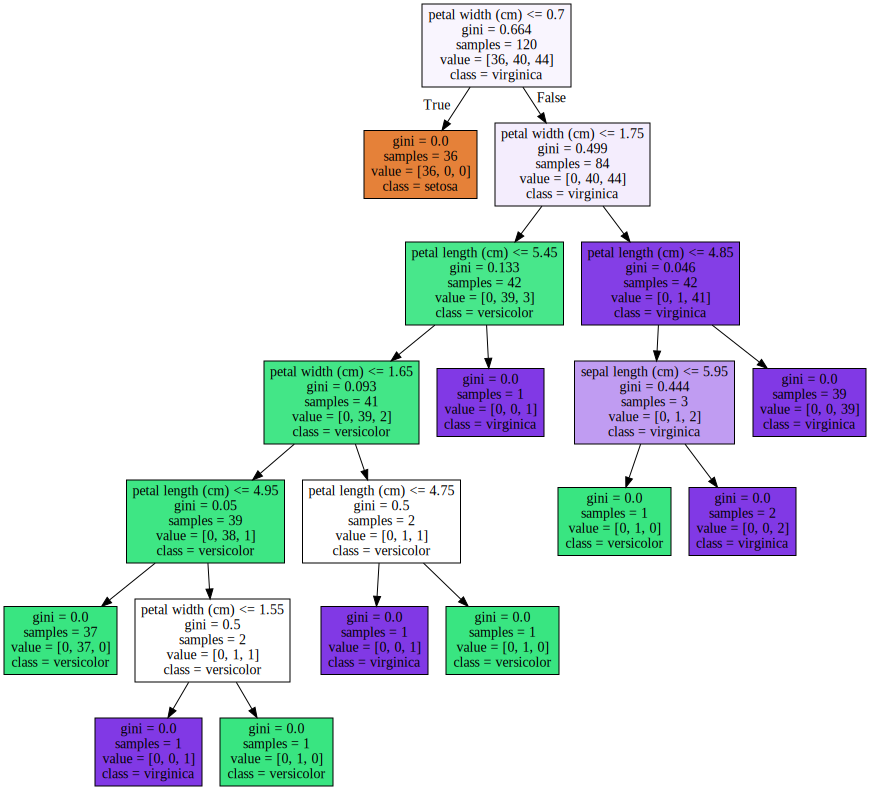

In [12]:
import graphviz

with open('tree.dot', 'r') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Hyper Parameter
- max_depth = 3

In [17]:
dt_clf2 = DecisionTreeClassifier(max_depth = 3, random_state = 2021)
dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2021)

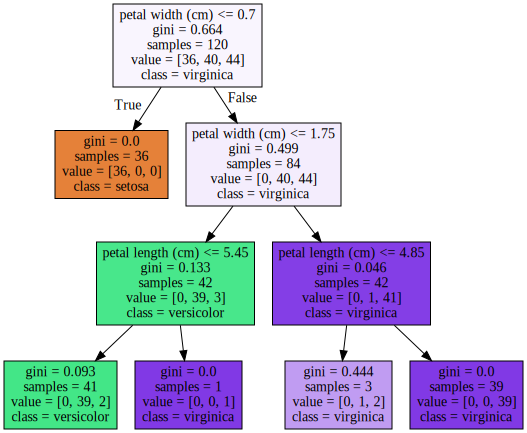

In [18]:
export_graphviz(
    dt_clf2,
    out_file = 'tree2.dot',
    class_names = iris.target_names,
    feature_names = iris.feature_names,
    impurity = True,
    filled = True
)

with open('tree2.dot', 'r') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [21]:
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

1.0

In [22]:
pred2 = dt_clf2.predict(X_test)
accuracy_score(y_test, pred2)

0.9666666666666667

### Hyper Parameter
- max_depth = 4

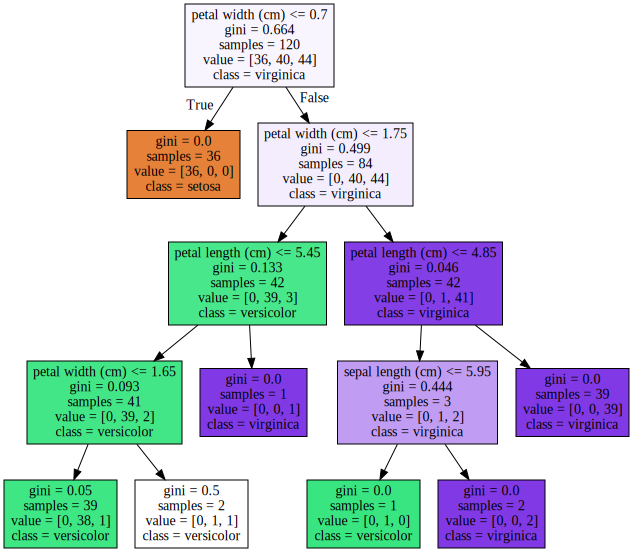

In [23]:
dt_clf3 = DecisionTreeClassifier(max_depth = 4, random_state = 2021)
dt_clf3.fit(X_train, y_train)

export_graphviz(
    dt_clf3,
    out_file = 'tree3.dot',
    class_names = iris.target_names,
    feature_names = iris.feature_names,
    impurity = True,
    filled = True
)

with open('tree3.dot', 'r') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [24]:
pred3 = dt_clf3.predict(X_test)
accuracy_score(y_test, pred3)

0.9666666666666667

### Feature importance

In [25]:
import seaborn as sns

In [26]:
dt_clf.feature_importances_

array([0.01672241, 0.        , 0.05436015, 0.92891744])

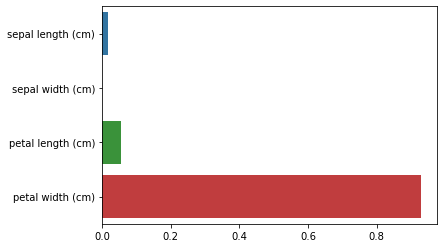

In [28]:
from matplotlib import pyplot as plt
sns.barplot(x = dt_clf.feature_importances_, y = iris.feature_names)
plt.show()